# Project Title:Marketing Campaign for Banking Products

# Data Description:
 The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# 1)Importing libraries and datasets,checking the datatype,Statistical Summary,Shape,null values etc.

# Importing libraries and Datasets

In [11]:
import numpy as np 
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [12]:
from google.colab import files
uploaded = files.upload()

Saving datasets_48024_87370_Bank_Personal_Loan_Modelling.csv to datasets_48024_87370_Bank_Personal_Loan_Modelling.csv


In [13]:
import io
data_bank = pd.read_csv("datasets_48024_87370_Bank_Personal_Loan_Modelling.csv")

In [14]:
#to display the top 10 row
data_bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [15]:
#to display the bottom 10 row
data_bank.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


# Checking the type of data and Statistical summary

In [16]:
#To display datatype of each column and also display the non-null rows for each column.
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [17]:
#To display the summary stat which include count , mean , std,min,max,etc.
data_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [18]:
#To display how many null values are present in each column
data_bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2.Dropping irrelevent columns
In a machine learning,it is neccessary to seperate signal from the noice.Hence the ID column which definitely doesn't have any signal is being dropped.Also ,the experiance column seens to have faulty data as soon values are negative.We can replace and impute those values,but i choose to drop this column as well ,as it seems to be highly correlated with the age column.

In [19]:
experience = data_bank['Experience']
age=data_bank['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

In [20]:
data_bank = data_bank.drop(['ID' , 'Experience'],axis=1 )
data_bank.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


# 3.EDA
Number of unique in each column

In [80]:
# number of unique in each column
data_bank.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

# Number of people with zero credit card spending per month

In [22]:
## Number of people with zero credit card spending per month
##  There are 106 people with zero average credit card spending per month
(data_bank.CCAvg == 0).sum()

106

Value counts of all categorical columns

In [23]:
data_bank.drop('ZIP Code' , axis = 1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


# Number of people with zero mortgage

In [24]:
## Number of People with 0 mortgage
## There are 3462 peoples with 0 mortgageout of 5000(making it skewed)
(data_bank.Mortgage == 0).sum()

3462

# Number of people with zero credit card spending per month

In [25]:
## Number of people with zero credit card spending per month
##  There are 106 people with zero average credit card spending per month
(data_bank.CCAvg == 0).sum()

106

# Value counts of all categorical columns¶

In [26]:
data_bank.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [27]:
data_bank.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [28]:
data_bank['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [29]:
data_bank['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [30]:
data_bank.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# 4)Univariate and Multivariate Analysis

## Univariate Analysis

Here we have to understand each feature or a single variable.One of the best plot to understand the single variable is the distplot.

### New Section

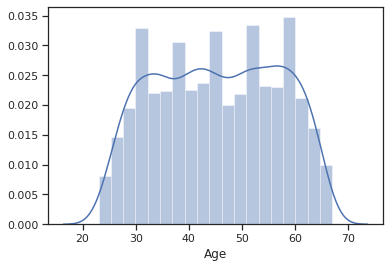

In [31]:
## Univariate Analysis
## Age seems to have symmetric Distribution
sns.distplot(data_bank.Age);

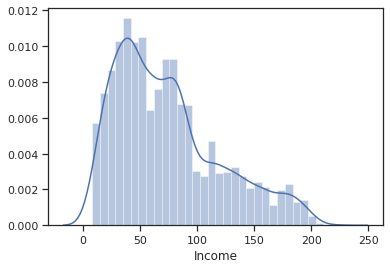

In [32]:
## Income is right skewed Distribution
sns.distplot(data_bank.Income);

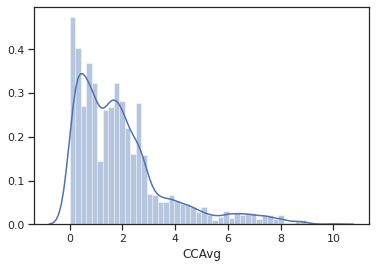

In [33]:
## Credit Card average is right skewed Distribution
sns.distplot(data_bank.CCAvg);

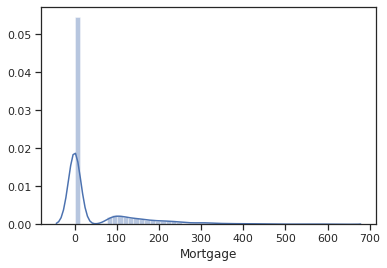

In [34]:
## Mortgage column seems highly skewed
sns.distplot(data_bank.Mortgage);

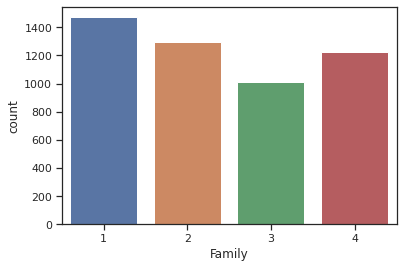

In [35]:
sns.countplot(data_bank.Family);

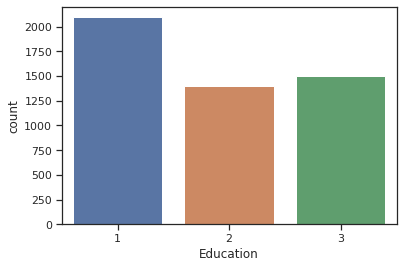

In [36]:
sns.countplot(data_bank.Education);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


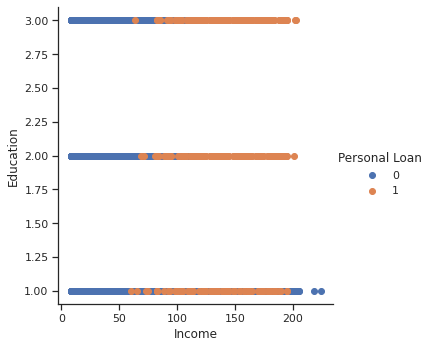

In [37]:
sns.FacetGrid(data_bank,hue="Personal Loan",size=5).map(plt.scatter,"Income","Education").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


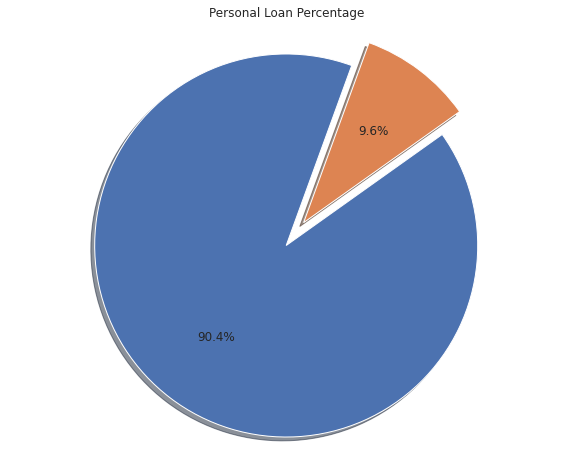

In [38]:
## Univariate Analysis
## 9.6 % all the applicats get approved for personal loan
tempDF =pd.DataFrame(data_bank["Personal Loan"].value_counts()).reset_index()
tempDF.column = ["Lables","Personal Loan"]
figl, axl = plt.subplots(figsize=(10,8))
explode = (0, 0.15)
axl.pie(tempDF["Personal Loan"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=70)
axl.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

# Multivariate

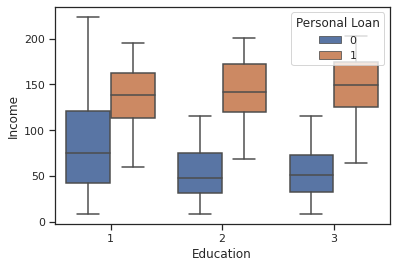

In [39]:
## It seems the costomers whose has more income is granted loan across each education level
sns.boxplot(x='Education' ,y= 'Income' ,hue='Personal Loan' ,data=data_bank);

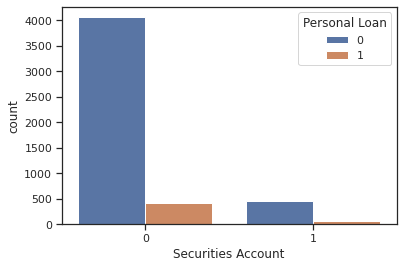

In [40]:
## Most of the people having Securities Account and don't have personal loan
sns.countplot(x="Securities Account", data=data_bank,hue="Personal Loan");

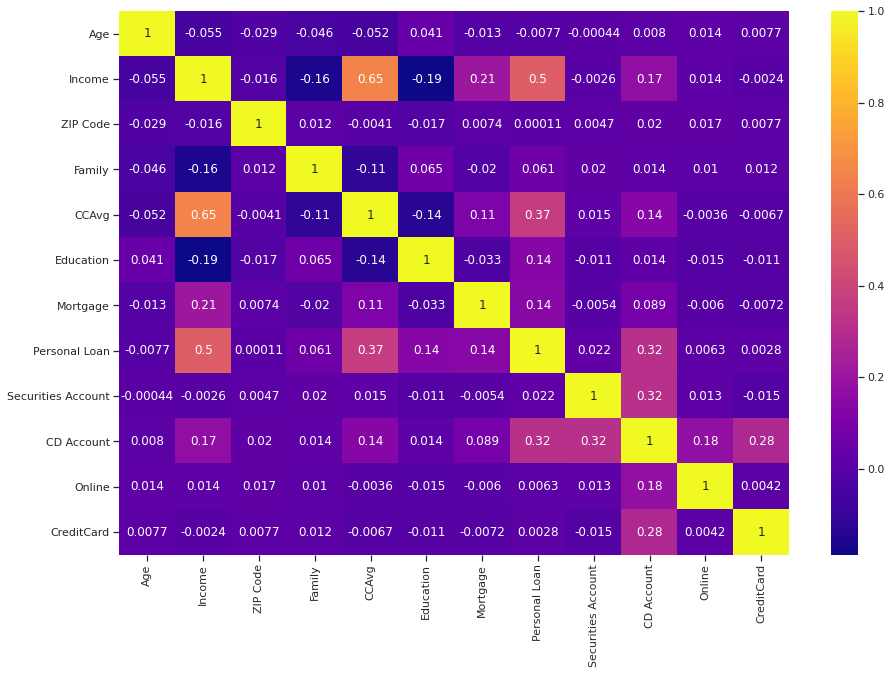

In [41]:
## after dropping Experience column earlier doesn't seem to be significant correlation between other variables except
## credit card average and income
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_bank.corr(),cmap='plasma' , annot=True) ;


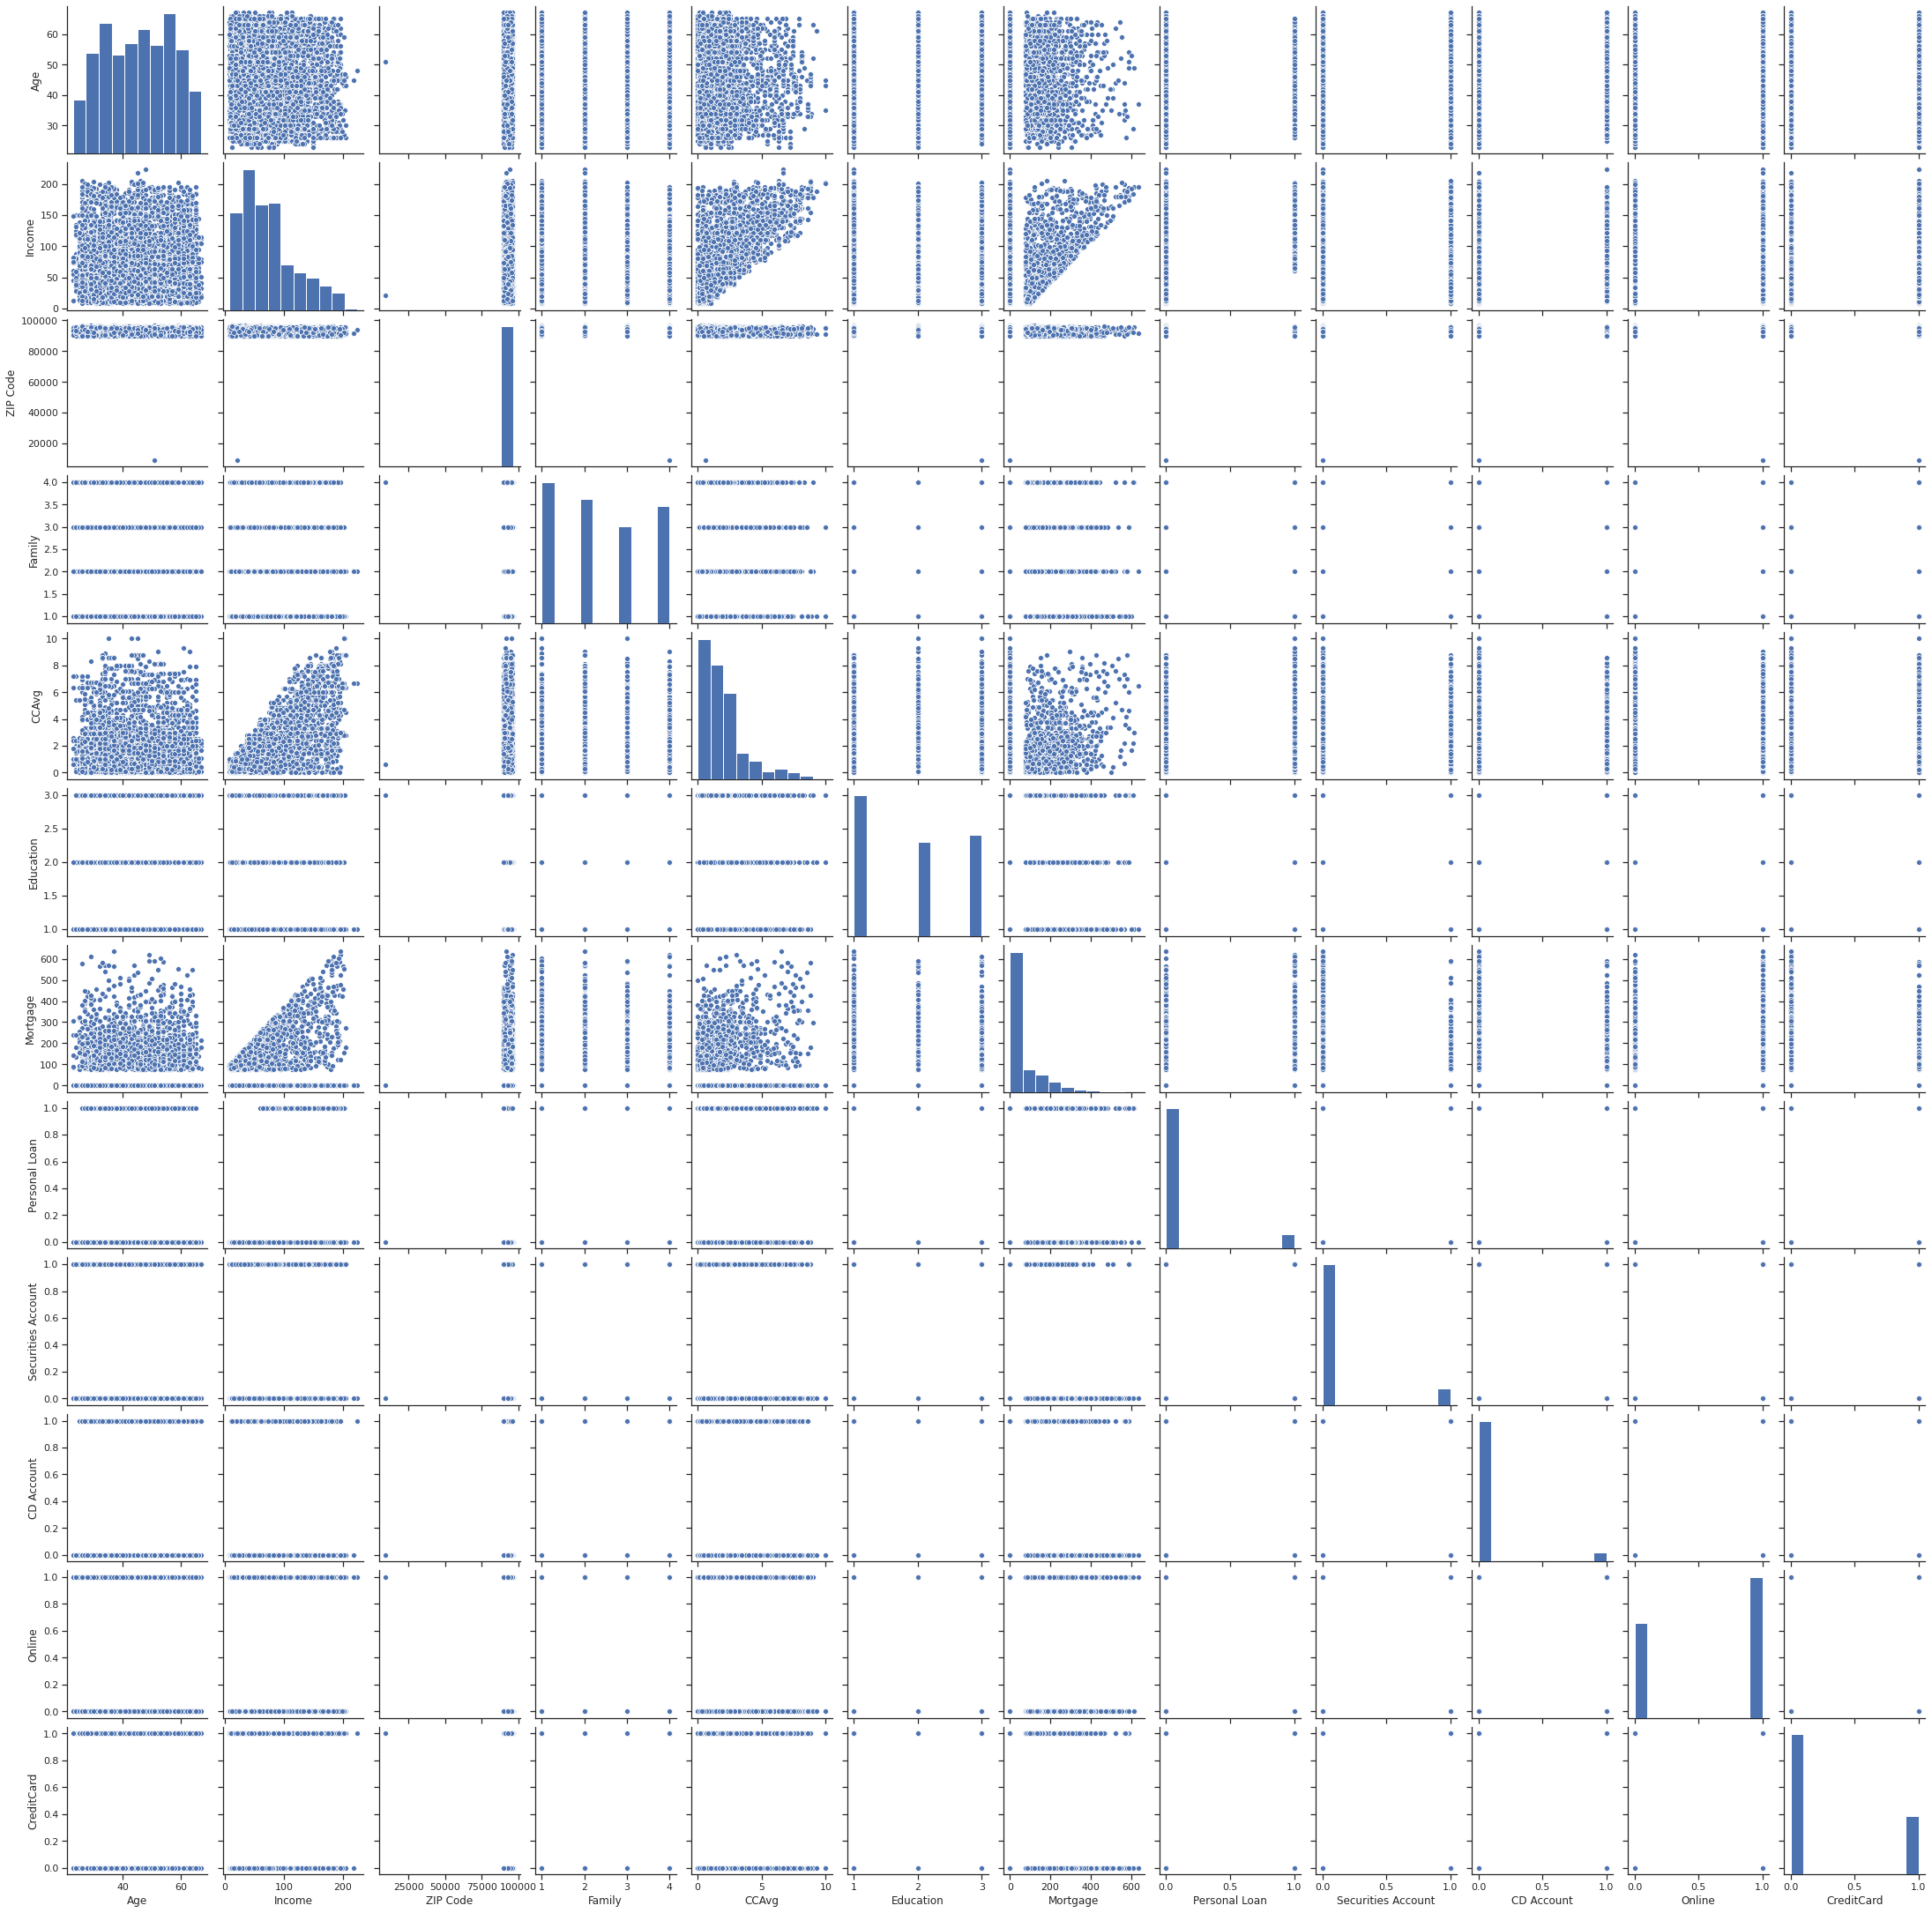

In [42]:
sns.pairplot(data_bank)

## Transformation of feature variables

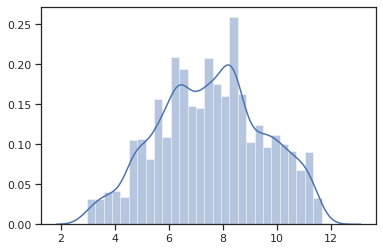

In [43]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson" , standardize=False)
pt.fit(data_bank["Income"].values.reshape(-1, 1))
temp = pt.transform(data_bank["Income"].values.reshape(-1, 1))
sns.distplot(temp);

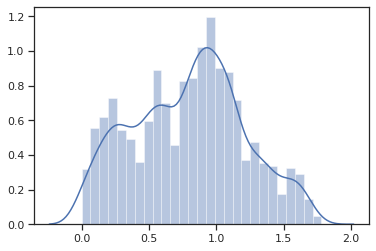

In [44]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_bank["CCAvg"].values.reshape(-1, 1))
temp = pt.transform(data_bank["CCAvg"].values.reshape(-1, 1))

sns.distplot(temp);


In [45]:
data_bank.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# 5. Splitting the data using stratified sampling

In [46]:
X = data_bank.drop(['Personal Loan'], axis=1)
y = data_bank['Personal Loan'].values

X.shape, y.shape

((5000, 11), (5000,))

In [47]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

## Test set in the ratio of 70:30

In [48]:
print("{0:0.2f}% data bank is in training set".format((len(X_train)/len(data_bank.index)) * 100))
print("{0:0.2f}% data bank is in test set".format((len(X_test)/len(data_bank.index)) * 100))

70.00% data bank is in training set
30.00% data bank is in test set


# 6)Logistic Regression

In [49]:
#importing required libraries
from sklearn.metrics import confusion_matrix , recall_score , precision_score , f1_score , roc_auc_score , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [50]:
# fit Model X_train and Y_train
Model = LogisticRegression(solver='liblinear')
Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_predict=Model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Accuracy score of Logistic Regression Model.
pred_X_test = Model.predict(X_test)
pred_X_train = Model.predict(X_train)

acc_X_train = accuracy_score(y_train,pred_X_train)
acc_X_test = accuracy_score(y_test,pred_X_test)
print("accuracy on X_train : {: .8f}" .format(acc_X_train))
print("accuracy on X_test : {: .8f}" .format(acc_X_test))

accuracy on X_train :  0.91200000
accuracy on X_test :  0.89933333


In [53]:
#classification Report of Logistic Regression
print(classification_report(y_test,pred_X_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.55      0.26      0.35       158

    accuracy                           0.90      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.88      0.90      0.88      1500



# 7)Metrics related for evaluating the model performance

In [54]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10066666666666667
Root Mean Squared Error 0.3172801075810878
R2 Score -0.0682148314437172


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.55      0.26      0.35       158

    accuracy                           0.90      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.88      0.90      0.88      1500



AUC - Test Set: 95.12%


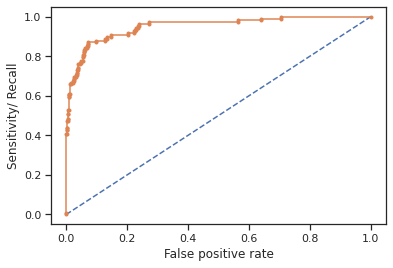

In [56]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = '/content/datasets_48024_87370_Bank_Personal_Loan_Modelling.csv'
df = pandas.read_csv(url)
dat = df.values
x=df[['Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y=df[['Personal Loan']]
#split data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, random_state=0)
Model.fit(X_train, Y_train)

# predict probabilities
probs = Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [57]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = '/content/datasets_48024_87370_Bank_Personal_Loan_Modelling.csv'
df = pandas.read_csv(url)
dat = df.values
x=df[['Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y=df[['Personal Loan']]
#split data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, random_state=0)
Model.fit(X_train, Y_train)
#predict and compute logloss
pred = Model.predict(X_test)
accuracy = log_loss(Y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 1.52


In [58]:
#Confusion matrix
cfm1=metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))

[[1308   34]
 [ 117   41]]


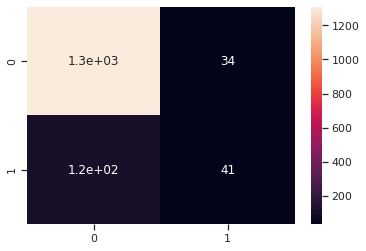

In [59]:
#Plotting of Hypothesis of Logistic Regression.
sns.heatmap(cfm1,annot=True)

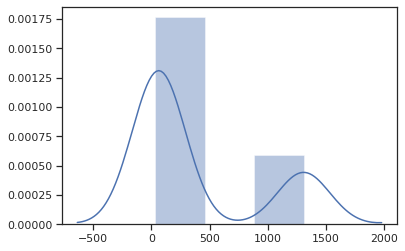

In [60]:
sns.distplot(cfm1)

In [61]:
X = data_bank.drop(['Personal Loan'], axis=1)
y = data_bank['Personal Loan'].values

X.shape, y.shape

((5000, 11), (5000,))

In [62]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

# 8)Build various Other Classification Algorithms and Compare their Performance

## Decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(random_state=0,max_depth=8)
dtree.fit(X_train,y_train)
y_pred2=dtree.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 1])

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
dt_model.score(X_test , y_test)

0.9773333333333334

In [66]:
y_predict = dt_model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [67]:
X_test.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


# Naive Bayes

In [68]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.8866666666666667

# KNN ( K - Nearest Neighbour )`

In [69]:
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)

In [71]:
NNH.score(X_test, y_test)

0.8926666666666667

In [72]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1307   35]
 [ 126   32]]


In [73]:
#Iteration 1:Using same features as derived in above Logistic model, we perofrmance getting improved
X_KNN_train = X_train.drop(['Age'],axis=1)
#                         'ZIP Code','CCAvg','Family_2','Education_1','Age','Mortgage'], axis=1)

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH1.fit(X_train, y_train)

X_KNN_test1 = X_test.drop(['Age'],axis=1)
predicted_labels_KNN = NNH1.predict(X_test)

NNH1.score(X_test, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1307   35]
 [ 126   32]]


In [74]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=32
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1307
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=35
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=126
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on X_test: {:.2%}'.format(Accuracy))

Accuracy of logistic regression classifier on X_test: 89.27%


# Random Forest classifier

In [75]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train, y_train)
y_pred=randomforest_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

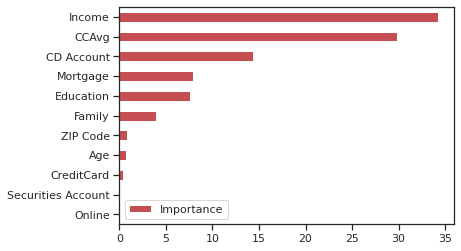

In [76]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [77]:
predicted_random=randomforest_model.predict(X_test)
randomforest_model.score(X_test,y_test)

0.904

In [78]:
from sklearn.metrics import accuracy_score

res=accuracy_score(y_test,y_pred)
print('Accuracy:',res)

Accuracy: 0.904


# Classifying All Algorithms

In [79]:
#Comparing Classification Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=500, criterion="entropy")))

for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=0)
  result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 90.82% - SD Accuracy = 0.79%
K Nearest Neighbor: Mean Accuracy = 89.86% - SD Accuracy = 0.89%
Naive Bayes: Mean Accuracy = 88.56% - SD Accuracy = 1.04%
Decision Tree: Mean Accuracy = 98.16% - SD Accuracy = 0.43%
Random Forest: Mean Accuracy = 98.60% - SD Accuracy = 0.35%


# 9) Conclusion(Business Understanding of the Model).

After comparing the outputs generated by all the models, the Accuracy given are as follows:

Logistic Regression - 90.82%

KNN - 89.86%

Naive Bayes - 88.56%

Decision Tree - 98.16%

RandomForest - 98.60%

### Hence RandomForest is the best model for this case & it performs better than others as above accuracy & respective findings from Confusion Matrix.